# In this Notebook I am going to **Handle Outliers** using **Z-Score**

## What we have to do -

### Importing **Libreries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the **CSV File**

In [2]:
path = r'/content/drive/MyDrive/Colab Notebooks/Datasets/Placement.csv'
df = pd.read_csv(path)

I am using **sample** function instead of **head**. Because **Head** returns **First** rows and **Sample** returns **Random** rows. So it helps to see the different data points.

In [3]:
df.sample(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
190,191,F,64.00,Others,70.20,Central,Commerce,61.0,Comm&Mgmt,No,50.00,Mkt&Fin,62.50,Not Placed,NaN
46,47,F,70.89,Others,71.98,Others,Science,65.6,Comm&Mgmt,No,68.00,Mkt&HR,71.63,Not Placed,NaN
187,188,M,78.50,Central,65.50,Central,Science,67.0,Sci&Tech,Yes,95.00,Mkt&Fin,64.86,Placed,280000.0
89,90,F,84.00,Others,75.00,Others,Science,69.0,Sci&Tech,Yes,62.00,Mkt&HR,62.36,Placed,210000.0
74,75,M,56.60,Central,64.80,Central,Commerce,70.2,Comm&Mgmt,No,84.27,Mkt&Fin,67.20,Placed,336000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In this case I have to work only on **Outliers** so I will keep only **3** columns

In [5]:
df = df[['degree_p', 'mba_p', 'status']]
df.sample(5)

,degree_p,mba_p,status
209,65.0,56.49,Placed
149,55.0,58.54,Not Placed
105,58.0,55.30,Not Placed
129,66.0,68.55,Placed
182,57.0,59.81,Not Placed


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


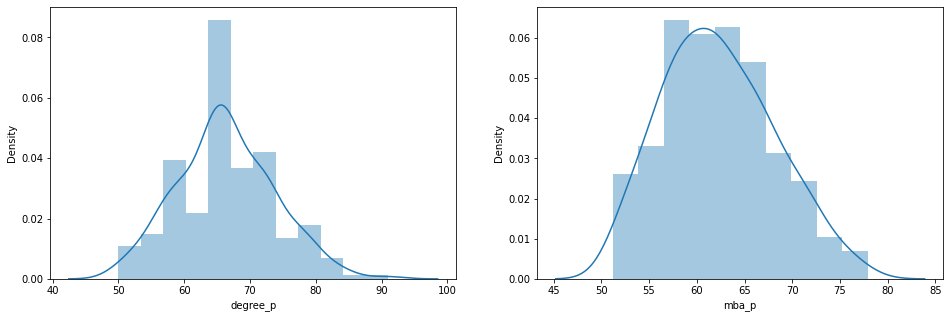

In [6]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['degree_p'])

plt.subplot(1,2,2)
sns.distplot(df['mba_p'])

plt.show()

After plotting this plot. It is clear that we can apply **Z-Score** only on **mba_p** column because it is **Normaly Distributed**

Some **Statitics**

In [7]:
print("Mean value of mba_p", df['mba_p'].mean())
print("Std value of mba_p", df['mba_p'].std())
print("Min value of mba_p", df['mba_p'].min())
print("Max value of mba_p", df['mba_p'].max())

Mean value of mba_p 62.278186046511586
Std value of mba_p 5.8333845806838
Min value of mba_p 51.21
Max value of mba_p 77.89


Now Finding the **Boundary Values**, so i can decide the **Outliers**

In [8]:
print("Highest allowed", df['mba_p'].mean() + 2.5*df['mba_p'].std())
print("Lowest allowed", df['mba_p'].mean() - 2.5*df['mba_p'].std())

Highest allowed 76.86164749822109
Lowest allowed 47.69472459480208


Now I will find the **Outliers**

In [9]:
df[(df['mba_p'] > 76) | (df['mba_p'] < 47)]

,degree_p,mba_p,status
19,70.00,77.89,Placed
85,77.20,76.18,Placed
128,77.72,76.26,Placed


# 1- **Trimming**

In [10]:
new_df = df[(df['mba_p'] < 76) & (df['mba_p'] > 47)]
new_df

,degree_p,mba_p,status
0,58.00,58.80,Placed
1,77.48,66.28,Placed
2,64.00,57.80,Placed
3,52.00,59.43,Not Placed
4,73.30,55.50,Placed
...,...,...,...
210,77.60,74.49,Placed
211,72.00,53.62,Placed
212,73.00,69.72,Placed
213,58.00,60.23,Placed


Those rows has been Removed

Now using **Z-Score**

- Calculating Z-Score for each dataset in column

      X`i = ( Xi - mean ) / Standared Deviation

In [11]:
df['mba_p_Zscore'] = (df['mba_p'] - df['mba_p'].mean()) / df['mba_p'].std()

In [12]:
df

,degree_p,mba_p,status,mba_p_Zscore
0,58.00,58.80,Placed,-0.596255
1,77.48,66.28,Placed,0.686019
2,64.00,57.80,Placed,-0.767682
3,52.00,59.43,Not Placed,-0.488256
4,73.30,55.50,Placed,-1.161965
...,...,...,...,...
210,77.60,74.49,Placed,2.093435
211,72.00,53.62,Placed,-1.484247
212,73.00,69.72,Placed,1.275728
213,58.00,60.23,Placed,-0.351115


Datapoints **Greater then 2.5 Z-Score**

In [17]:
df[df['mba_p_Zscore'] > 2.5]

,degree_p,mba_p,status,mba_p_Zscore
19,70.0,77.89,Placed,2.676287


Datapoints **Lesser then -2.5 Z-Score**

In [19]:
df[df['mba_p_Zscore'] < -2.5]

,degree_p,mba_p,status,mba_p_Zscore


Both Data pints in one Dataframe

In [21]:
df[(df['mba_p_Zscore'] > 2.5) | (df['mba_p_Zscore'] < -2.5)]

,degree_p,mba_p,status,mba_p_Zscore
19,70.0,77.89,Placed,2.676287


# **Trimming**

In [24]:
new_Zscore_df = df[(df['mba_p_Zscore'] < 2.5) & (df['mba_p_Zscore'] > -2.5)]

In [25]:
new_Zscore_df

,degree_p,mba_p,status,mba_p_Zscore
0,58.00,58.80,Placed,-0.596255
1,77.48,66.28,Placed,0.686019
2,64.00,57.80,Placed,-0.767682
3,52.00,59.43,Not Placed,-0.488256
4,73.30,55.50,Placed,-1.161965
...,...,...,...,...
210,77.60,74.49,Placed,2.093435
211,72.00,53.62,Placed,-1.484247
212,73.00,69.72,Placed,1.275728
213,58.00,60.23,Placed,-0.351115


# Now **Capping** Data points

In [26]:
upper_limit = df['mba_p'].mean() + 2.5*df['mba_p'].std()
lower_limit = df['mba_p'].mean() - 2.5*df['mba_p'].std()

In [27]:
df['mba_p'] = np.where(
    df['mba_p'] > upper_limit,
    upper_limit,
    np.where(
        df['mba_p'] < lower_limit,
        lower_limit,
        df['mba_p']
    )
)

In [28]:
df.shape

(215, 4)

In [30]:
df['mba_p'].describe()

count    215.000000
mean      62.273403
std        5.820932
min       51.210000
25%       57.945000
50%       62.000000
75%       66.255000
max       76.861647
Name: mba_p, dtype: float64